# 0. Install and Import Dependencies

In [1]:
!pip list

Package                       Version
----------------------------- ----------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.2.0
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
archspec                      0.2.1
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy      

In [2]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [3]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [6]:
import gdown

In [97]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=6c84ada6-2a30-4b91-937c-524021425c87
To: /Users/luch/Data Analysis-Science Projects/LipReadingApp/data.zip
100%|████████████████████████████████████████| 423M/423M [01:37<00:00, 4.33MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [8]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [9]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [10]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [11]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [12]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [13]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [14]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [29]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    # file_name = path.split('\\')[-1].split('.')[0]
    file_name = path.split('/')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [33]:
test_path = './data/s1/bbal6n.mpg'

In [34]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [35]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

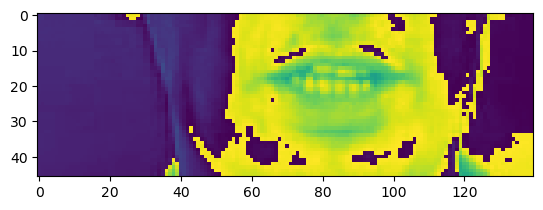

In [36]:
plt.imshow(frames[40])

In [37]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [38]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [39]:
# def mappable_function(path:str) ->List[str]:
#     result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
#     return result

from typing import Tuple
def mappable_function(path:str) ->Tuple[tf.Tensor, tf.Tensor]:
      result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
      return result

# 2. Create Data Pipeline

In [40]:
from matplotlib import pyplot as plt

In [41]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [42]:
ls data/s1/

Thumbs.db   brwa4p.mpg  lgif2p.mpg  pbav2n.mpg  prwd7a.mpg  sgbp6p.mpg
bbaf2n.mpg  brwa5a.mpg  lgif3a.mpg  pbav3s.mpg  prwj8n.mpg  sgbp7a.mpg
bbaf3s.mpg  brwg6n.mpg  lgifzn.mpg  pbav4p.mpg  prwj9s.mpg  sgbv8n.mpg
bbaf4p.mpg  brwg7s.mpg  lgil4n.mpg  pbav5a.mpg  prwk1a.mpg  sgbv9s.mpg
bbaf5a.mpg  brwg8p.mpg  lgil5s.mpg  pbbc4n.mpg  prwkzp.mpg  sgbx1a.mpg
bbal6n.mpg  brwg9a.mpg  lgil6p.mpg  pbbc5s.mpg  prwq2n.mpg  sgbxzp.mpg
bbal7s.mpg  brwn1s.mpg  lgil7a.mpg  pbbc6p.mpg  prwq3s.mpg  sgib8n.mpg
bbal8p.mpg  brwn2p.mpg  lgir8n.mpg  pbbc7a.mpg  prwq4p.mpg  sgib9s.mpg
bbal9a.mpg  brwn3a.mpg  lgir9s.mpg  pbbi8n.mpg  prwq5a.mpg  sgic1a.mpg
bbas1s.mpg  brwnzn.mpg  lgis1a.mpg  pbbi9s.mpg  prwx6n.mpg  sgiczp.mpg
bbas2p.mpg  brwt4n.mpg  lgiszp.mpg  pbbj1a.mpg  prwx7s.mpg  sgii2n.mpg
bbas3a.mpg  brwt5s.mpg  lgiz2n.mpg  pbbjzp.mpg  prwx8p.mpg  sgii3s.mpg
bbaszn.mpg  brwt6p.mpg  lgiz3s.mpg  pbbp2n.mpg  prwx9a.mpg  sgii4p.mpg
bbaz4n.mpg  brwt7a.mpg  lgiz4p.mpg  pbbp3s.mpg  pwad2n.mpg  sgii5a.mpg
bbaz5s

In [43]:
len(test)

50

In [44]:
frames, alignments = data.as_numpy_iterator().next()

In [45]:
len(frames)

2

In [46]:
sample = data.as_numpy_iterator()

In [47]:
val = sample.next(); val[0]

[mpeg1video @ 0x29c6715c0] ac-tex damaged at 22 17
[mpeg1video @ 0x29c6715c0] Warning MVs not available


array([[[[[ 1.4785635 ],
          [ 1.5543873 ],
          [ 1.6302111 ],
          ...,
          [ 0.3032951 ],
          [ 0.341207  ],
          [ 0.341207  ]],

         [[ 1.4785635 ],
          [ 1.5164754 ],
          [ 1.7818587 ],
          ...,
          [ 0.3032951 ],
          [ 0.341207  ],
          [ 0.341207  ]],

         [[ 1.5164754 ],
          [ 1.5164754 ],
          [ 1.4785635 ],
          ...,
          [ 0.37911886],
          [ 0.3032951 ],
          [ 0.3032951 ]],

         ...,

         [[ 1.1373566 ],
          [ 1.1373566 ],
          [ 1.1373566 ],
          ...,
          [ 0.        ],
          [ 0.        ],
          [ 0.        ]],

         [[ 1.1373566 ],
          [ 1.1373566 ],
          [ 1.1373566 ],
          ...,
          [ 0.        ],
          [ 0.        ],
          [ 0.        ]],

         [[ 1.1373566 ],
          [ 1.1373566 ],
          [ 1.1373566 ],
          ...,
          [ 0.        ],
          [ 0.        ],
          

In [54]:
# imageio.mimsave('./animation.gif', val[0][0], duration=100) # duration is in milliseconds

# print(images.shape, images.dtype)

# Convert grayscale images to RGB by repeating the single channel 3 times
# Only do this if you need to convert single-channel images to RGB
# images_rgb = np.repeat(images, 3, axis=-1)
# imageio.mimsave('./animation.gif', images, duration=100

# Ensure that 'images' is a list of 2D arrays
frames = [img.squeeze() for img in images]  # Squeeze to remove the single-channel dimension
imageio.mimsave('./animation.gif', frames, duration=100)


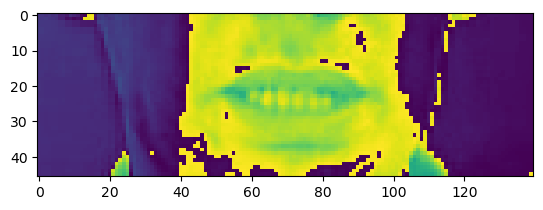

In [55]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [56]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set green in b eight now'>

# 3. Design the Deep Neural Network

In [57]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [58]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [59]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 75, 23, 70, 128)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                        

In [61]:
5*17*75

6375

In [62]:
yhat = model.predict(val[0])

1/1 [==============================] - 2s 2s/step


In [63]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'rrrlllllllllllllllllffffffffllllllllllllllllwwwwfffllllllllllllllllllllllff'>

In [64]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'rrrlllllllllllllllllffffffffllllllllllllllllwwwwfffllllllllllllllllllllllff'>

In [65]:
model.input_shape

(None, 75, 46, 140, 1)

In [66]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [67]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [68]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [69]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [77]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

from tensorflow.keras.optimizers import legacy

# Use the legacy Adam optimizer
model.compile(optimizer=legacy.Adam(learning_rate=0.0001), loss=CTCLoss)


In [78]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [79]:
schedule_callback = LearningRateScheduler(scheduler)

In [80]:
example_callback = ProduceExample(test)

In [83]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100
 11/450 [..............................] - ETA: 1:50:51 - loss: 96.0676

[mpeg1video @ 0x2a4ce8b90] ac-tex damaged at 22 17
[mpeg1video @ 0x2a4ce8b90] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.7085 

[mpeg1video @ 0x2a4cdef80] ac-tex damaged at 22 17
[mpeg1video @ 0x2a4cdef80] Warning MVs not available
[mpeg1video @ 0x2d627cbe0] ac-tex damaged at 22 17
[mpeg1video @ 0x2d627cbe0] Warning MVs not available


1/1 [==============================] - 2s 2s/step
Original: place white at x four now
Prediction: le e e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue in f zero please
Prediction: le e e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 7485s 17s/step - loss: 76.7085 - val_loss: 67.5819 - lr: 1.0000e-04
Epoch 2/100
364/450 [=======================>......] - ETA: 22:47 - loss: 69.5156

[mpeg1video @ 0x2ce9b8db0] ac-tex damaged at 22 17
[mpeg1video @ 0x2ce9b8db0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 69.0630 

[mpeg1video @ 0x2e4f55b10] ac-tex damaged at 22 17
[mpeg1video @ 0x2e4f55b10] Warning MVs not available


1/1 [==============================] - 2s 2s/step
Original: lay blue by e zero now
Prediction: la e e e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue by v nine again
Prediction: la e e e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 7339s 16s/step - loss: 69.0630 - val_loss: 62.2204 - lr: 1.0000e-04
Epoch 3/100
174/450 [==========>...................] - ETA: 1:07:10 - loss: 65.8145

[mpeg1video @ 0x2a4ada0a0] ac-tex damaged at 22 17
[mpeg1video @ 0x2a4ada0a0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 65.3467 

[mpeg1video @ 0x2a0394390] ac-tex damaged at 22 17
[mpeg1video @ 0x2a0394390] Warning MVs not available


KeyboardInterrupt: 

# 5. Make a Prediction 

In [84]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=b6cc9181-8396-4ace-bb3a-92571f5a0d13
To: /Users/luch/Data Analysis-Science Projects/LipReadingApp/checkpoints.zip
100%|██████████████████████████████████████| 94.5M/94.5M [00:20<00:00, 4.56MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [85]:
model.load_weights('models/checkpoint')

In [86]:
test_data = test.as_numpy_iterator()

In [87]:
sample = test_data.next()

[mpeg1video @ 0x2d13af670] ac-tex damaged at 22 17
[mpeg1video @ 0x2d13af670] Warning MVs not available


In [88]:
yhat = model.predict(sample[0])

1/1 [==============================] - 2s 2s/step


In [89]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green at n seven again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set blue by h five again'>]

In [90]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [91]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green at n seven again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set blue by h five again'>]

# Test on a Video

In [92]:
sample = load_data(tf.convert_to_tensor('./data/s1/bras9a.mpg'))

In [93]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [94]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 920ms/step


In [95]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [96]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]